# Ames Housing Price Prediction
Exploring relationships between housing features and price using Ridge Regression.

## Project Summary
This notebook walks through data exploration, custom feature engineering, model training, and evaluation for a Ridge Regression approach to predicting house prices.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visual style
sns.set(style="whitegrid")
%matplotlib inline


## Step 1: Load and Explore the Data

In [6]:
data = pd.read_csv("AmesHousing.csv")

In [5]:
import os
os.getcwd()

'C:\\Users\\darta\\PycharmProjects\\PythonProject3\\ames_housing_price_ml_project'

In [7]:
print(data.shape)
data.head()

(545, 13)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [9]:
# Data types and non-null values
data.info()

# Basic stats
data.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


In [10]:
missing = data.isnull().sum()
missing[missing > 0].sort_values(ascending=False)


Series([], dtype: int64)

Text(0.5, 1.0, 'Missing Values Heatmap')

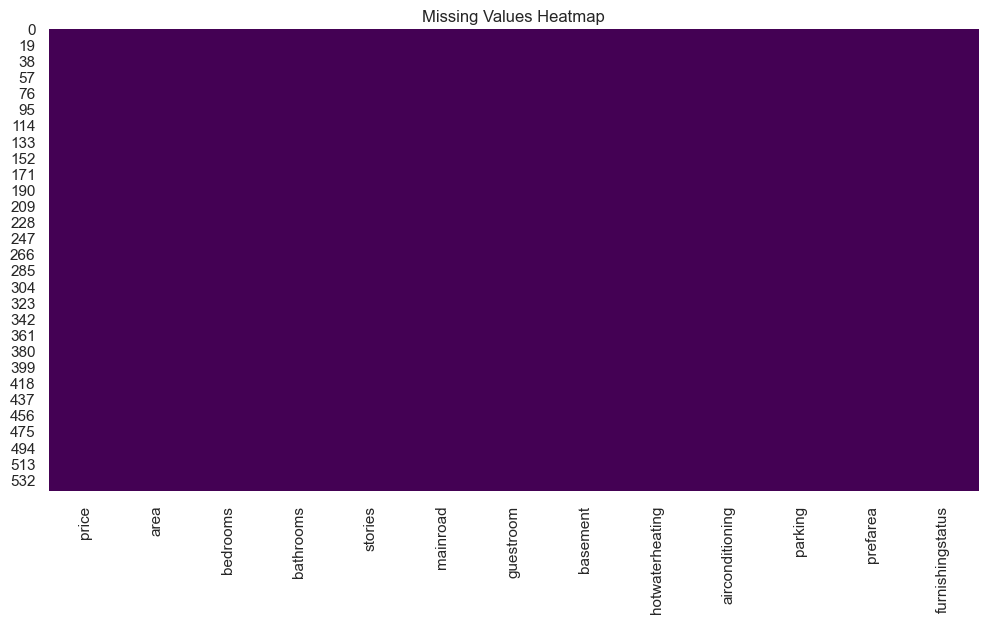

In [11]:
plt.figure(figsize=(12,6))
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")


Text(0.5, 1.0, 'Sale Price Distribution')

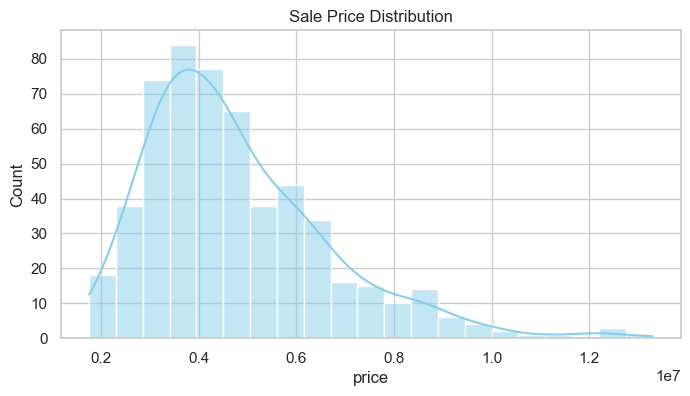

In [14]:
plt.figure(figsize=(8,4))
sns.histplot(data["price"], kde=True, color="skyblue")
plt.title("Sale Price Distribution")

In [13]:
print(data.columns.tolist())

['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']


In [15]:
# Correlation matrix (numerical only)
correlation_matrix = data.corr(numeric_only=True)

# Sort features most correlated with price
top_corr_features = correlation_matrix["price"].sort_values(ascending=False)
print(top_corr_features.head(10))


price        1.000000
area         0.535997
bathrooms    0.517545
stories      0.420712
parking      0.384394
bedrooms     0.366494
Name: price, dtype: float64


Text(0.5, 1.0, 'Top Correlated Features with Price')

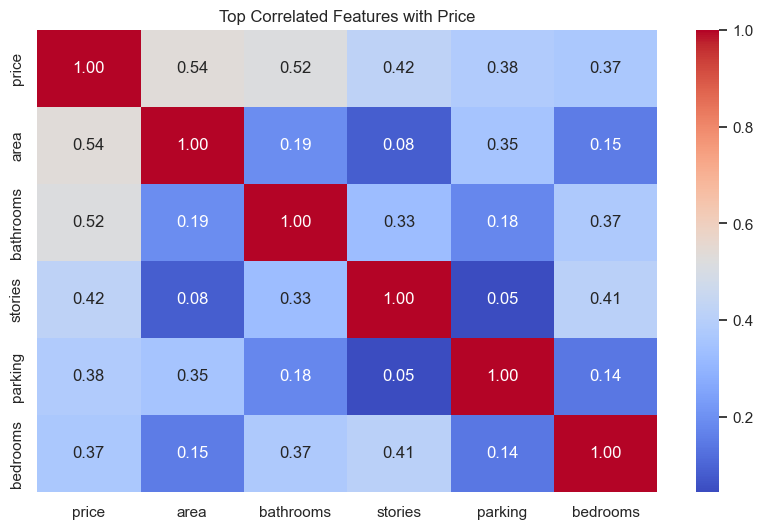

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(data[top_corr_features.index[:10]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Top Correlated Features with Price")


Text(0.5, 1.0, 'Basement vs. Price')

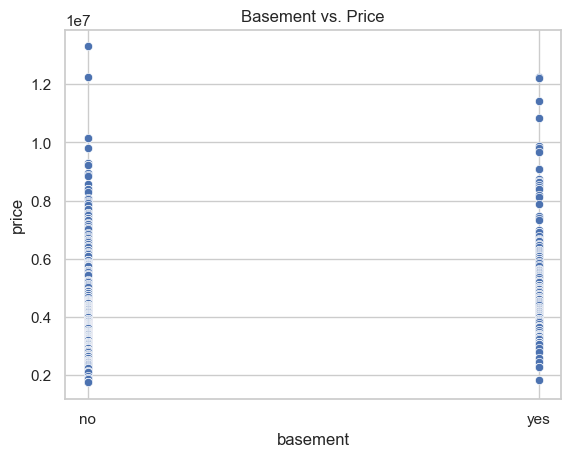

In [19]:
sns.scatterplot(x="basement", y="price", data=data)
plt.title("Basement vs. Price")

Text(0.5, 1.0, 'Furnishing vs. Price')

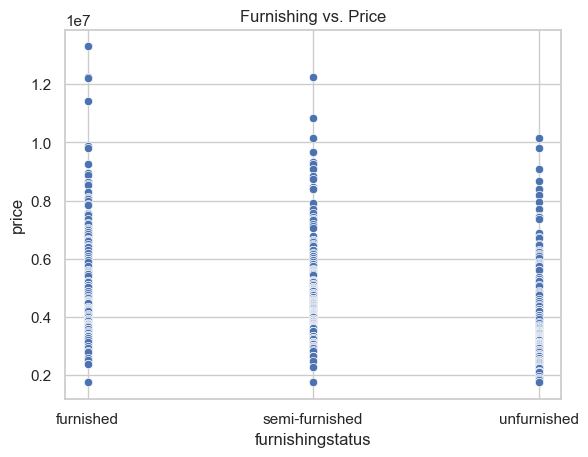

In [20]:
sns.scatterplot(x="furnishingstatus", y="price", data=data)
plt.title("Furnishing vs. Price")

Text(0.5, 1.0, 'Area vs. Price')

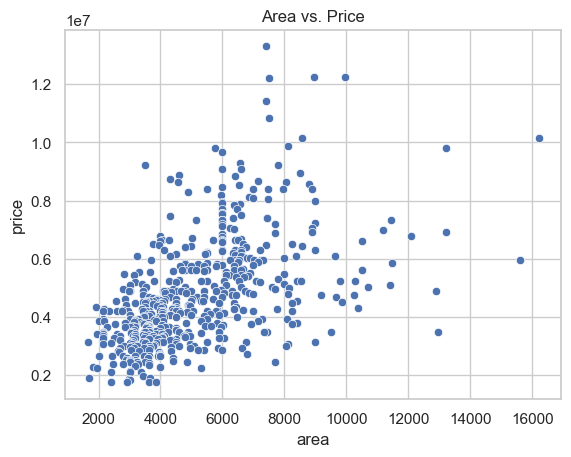

In [21]:
sns.scatterplot(x="area", y="price", data=data)
plt.title("Area vs. Price")

## Step 2: Feature Engineering

In [25]:
# Total "room-like" areas = bedrooms + bathrooms (assuming each is a room), plus stories
data["TotalEffectiveRooms"] = data["bedrooms"] + data["bathrooms"] + data["stories"]

In [26]:
data["HasMainRoadAccess"] = data["mainroad"].map({"yes": 1, "no": 0})
data["HasGuestRoom"] = data["guestroom"].map({"yes": 1, "no": 0})
data["HasBasement"] = data["basement"].map({"yes": 1, "no": 0})
data["HasHotWater"] = data["hotwaterheating"].map({"yes": 1, "no": 0})
data["HasAirConditioning"] = data["airconditioning"].map({"yes": 1, "no": 0})
data["IsPreferredArea"] = data["prefarea"].map({"yes": 1, "no": 0})

In [27]:
data["LuxuryScore"] = (
    data["HasGuestRoom"] +
    data["HasAirConditioning"] +
    data["IsPreferredArea"] +
    data["HasHotWater"]
)

In [28]:
data["LogPrice"] = np.log1p(data["price"])

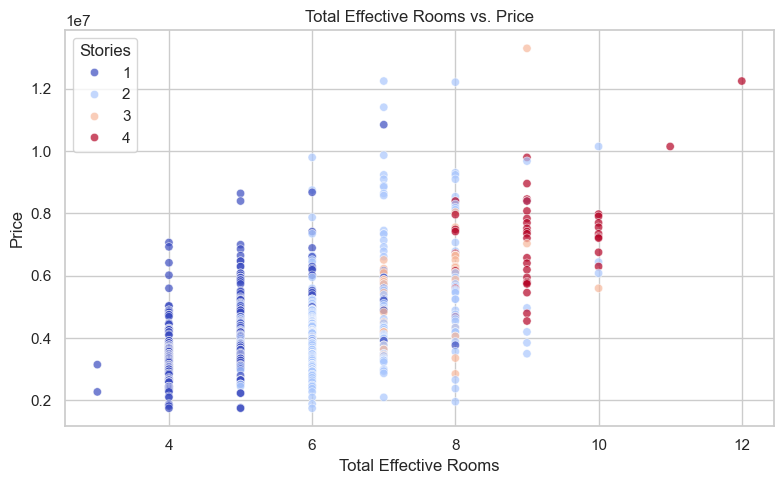

In [29]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x="TotalEffectiveRooms", y="price", data=data, hue="stories", palette="coolwarm", alpha=0.7)
plt.title("Total Effective Rooms vs. Price")
plt.xlabel("Total Effective Rooms")
plt.ylabel("Price")
plt.legend(title="Stories")
plt.tight_layout()
plt.show()

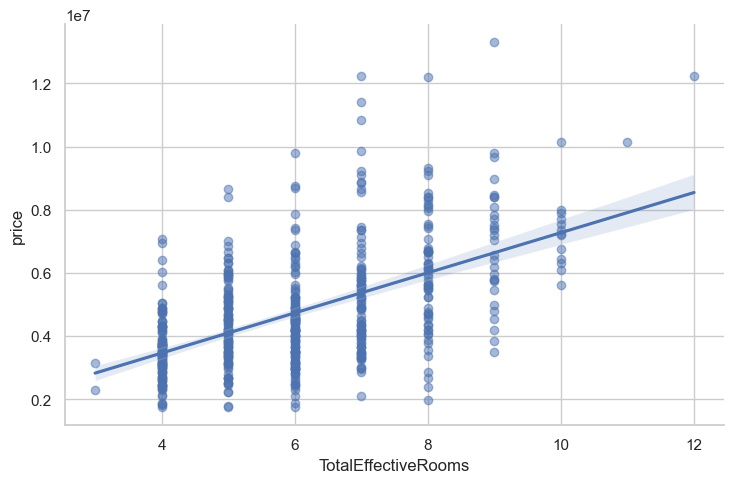

In [30]:
sns.lmplot(x="TotalEffectiveRooms", y="price", data=data, aspect=1.5, scatter_kws={"alpha":0.5})

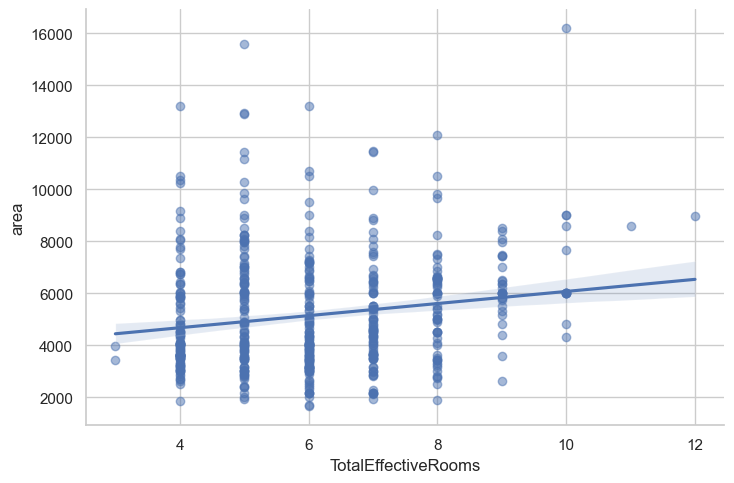

In [32]:
sns.lmplot(x="TotalEffectiveRooms", y="area", data=data, aspect=1.5, scatter_kws={"alpha":0.5})

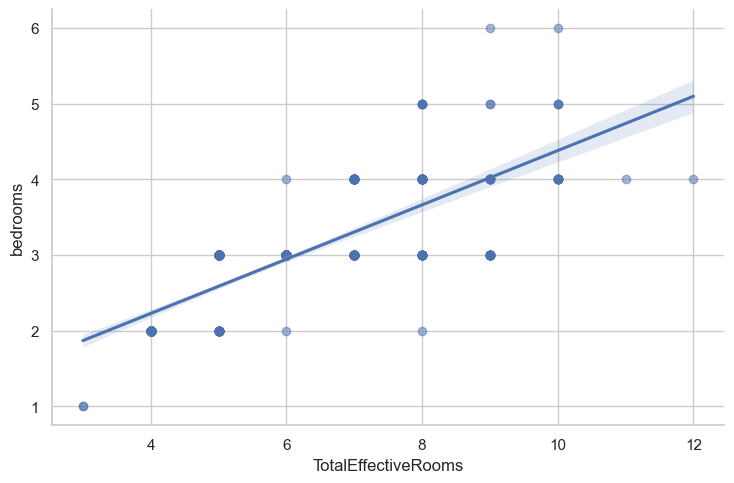

In [34]:
sns.lmplot(x="TotalEffectiveRooms", y="bedrooms", data=data, aspect=1.5, scatter_kws={"alpha":0.5})

<Axes: xlabel='LuxuryScore', ylabel='price'>

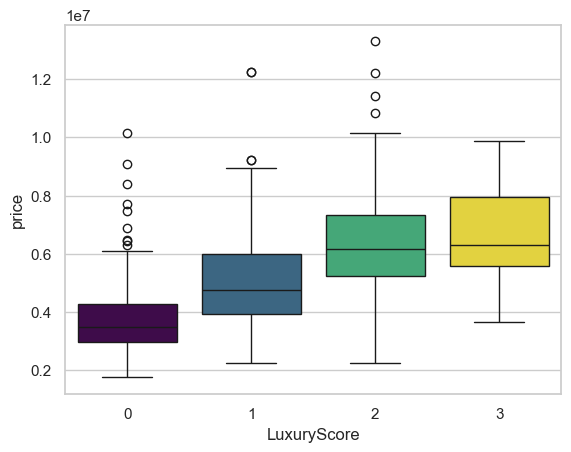

In [36]:
sns.boxplot(x="LuxuryScore", y="price", hue="LuxuryScore", data=data, palette="viridis", legend=False)

In [37]:
categorical_cols = data.select_dtypes(include="object").columns
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

In [38]:
data_encoded.isnull().sum().sum()  # Should be 0

np.int64(0)

## Step 3: Model Comparison and Evaluation

In [39]:
X = data_encoded.drop(["price", "LogPrice"], axis=1)
y = data_encoded["LogPrice"]  # We’ll use log-transformed price for modeling

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize & fit
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
y_pred_lr = lr.predict(X_test)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2 = r2_score(y_test, y_pred_lr)

print(f"Linear Regression RMSE: {rmse:.2f}")
print(f"Linear Regression R²: {r2:.3f}")

Linear Regression RMSE: 0.25
Linear Regression R²: 0.672


In [42]:
from sklearn.ensemble import RandomForestRegressor

# Initialize & fit
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# Evaluate
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest RMSE: {rmse_rf:.2f}")
print(f"Random Forest R²: {r2_rf:.3f}")

Random Forest RMSE: 0.26
Random Forest R²: 0.653


In [43]:
!pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
    --------------------------------------- 3.1/150.0 MB 23.1 MB/s eta 0:00:07
   -- ------------------------------------- 9.4/150.0 MB 25.6 MB/s eta 0:00:06
   ---- ----------------------------------- 18.4/150.0 MB 31.3 MB/s eta 0:00:05
   -------- ------------------------------- 31.5/150.0 MB 39.2 MB/s eta 0:00:04
   ------------ --------------------------- 46.1/150.0 MB 45.9 MB/s eta 0:00:03
   --------------- ------------------------ 59.8/150.0 MB 48.9 MB/s eta 0:00:02
   ------------------- -------------------- 71.8/150.0 MB 50.9 MB/s eta 0:00:02
   ---------------------- ----------------- 84.4/150.0 MB 51.3 MB/s eta 0:00:02
   ------------------------ --------------- 91.2/150.0 MB 48.9 MB/s eta 0:00:02
   -------------------------- ------------ 102.8/150.0 MB 49.7 MB/s eta 0:00:01
   ----------------------------- --------- 113.8/150.0 MB 49.4 MB/s eta 0:00:01
   -------------------------------- ------ 124.8/15

In [44]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost RMSE: {rmse_xgb:.2f}")
print(f"XGBoost R²: {r2_xgb:.3f}")

XGBoost RMSE: 0.27
XGBoost R²: 0.622


In [45]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)

rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression RMSE: {rmse_ridge:.2f}")
print(f"Ridge Regression R²: {r2_ridge:.3f}")

Ridge Regression RMSE: 0.25
Ridge Regression R²: 0.672


In [46]:
os.makedirs("models", exist_ok=True)

In [47]:
import joblib

# Save the trained Ridge model to disk
joblib.dump(ridge, "models/ridge_regression_model.pkl")

['models/ridge_regression_model.pkl']

## Conclusion
Ridge Regression delivered the best performance with:
- **RMSE:** 0.25
- **R²:** 0.672  
Feature engineering like `LuxuryScore` and `TotalEffectiveRooms` provided strong predictive power.